In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
plt.style.use("seaborn-dark")
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [24]:
matplotlib.rcParams["figure.figsize"] = [16, 4]
matplotlib.rcParams["figure.dpi"] = 150
matplotlib.rcParams["axes.grid"] = True
matplotlib.rcParams['lines.linewidth'] = 0.8

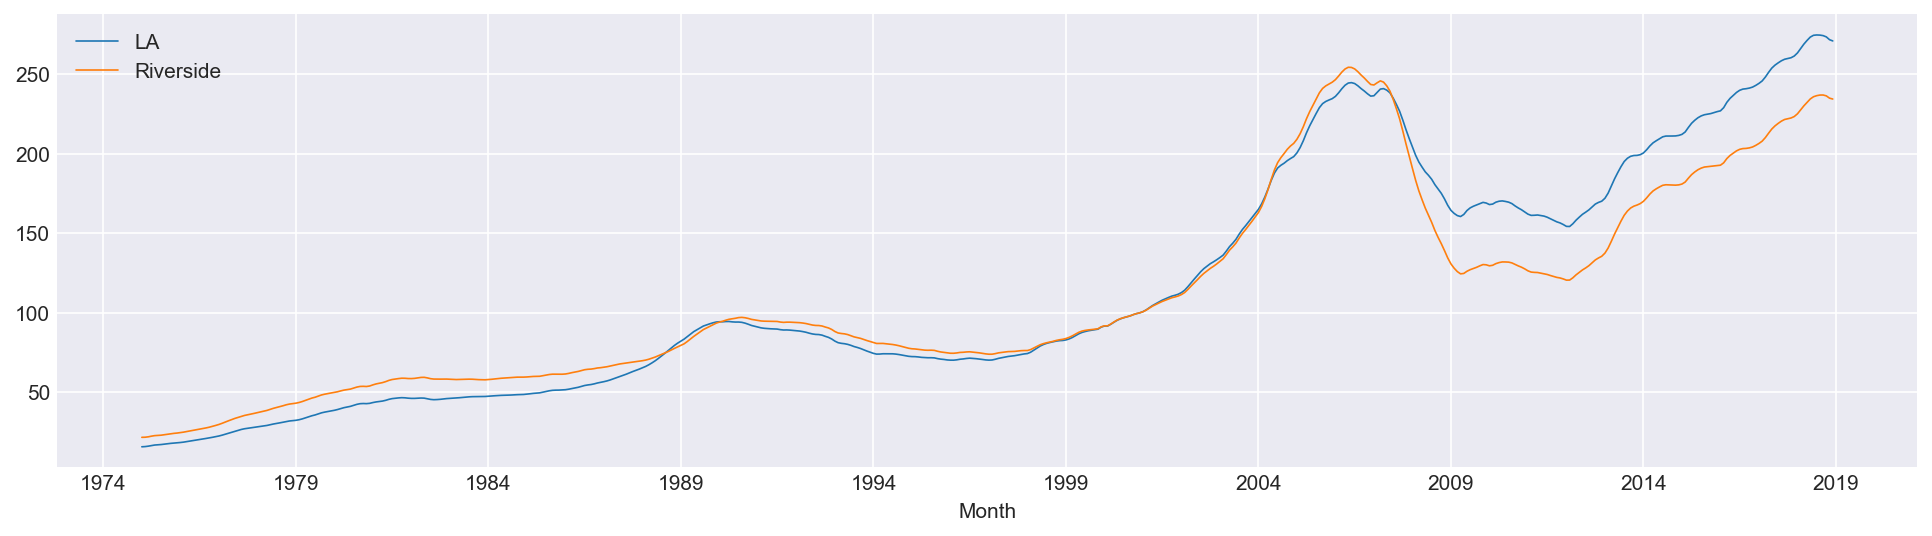

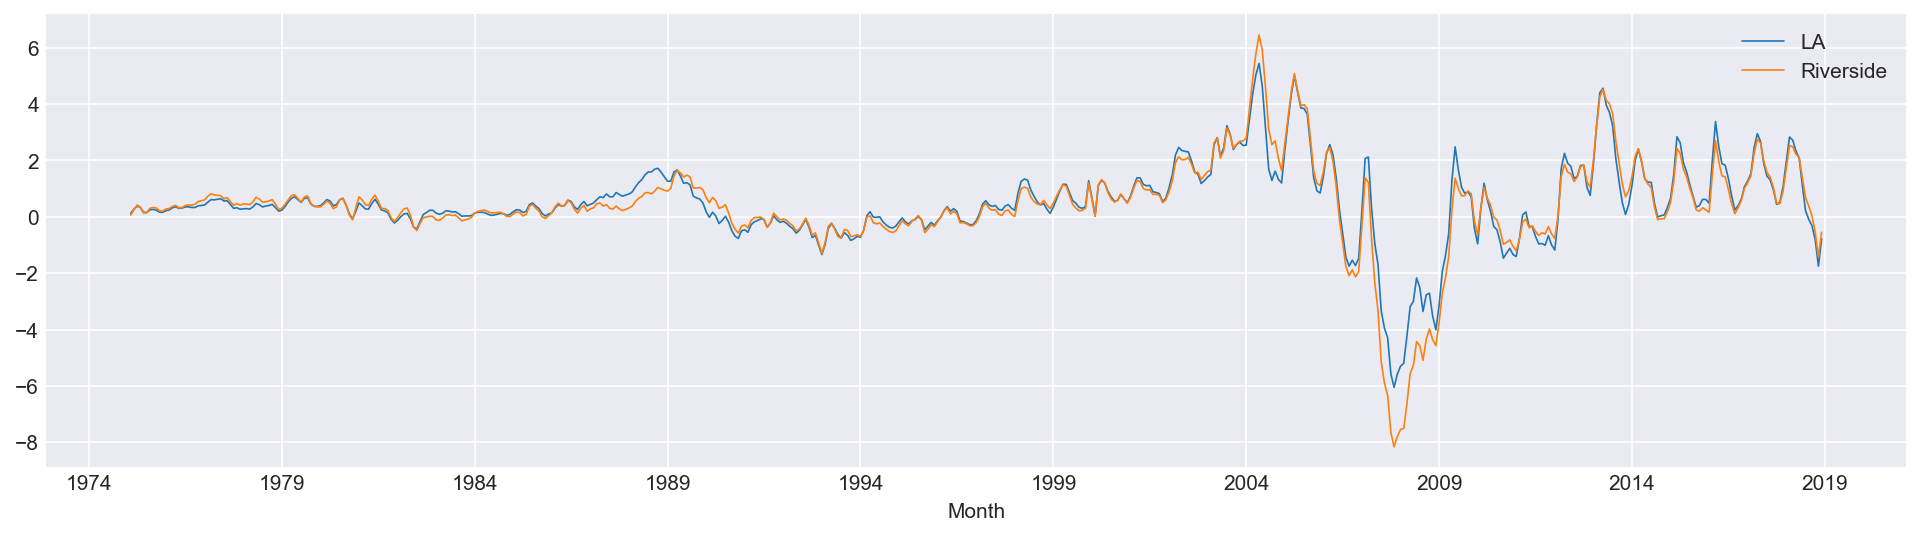

In [25]:
date_format = lambda x: datetime.strptime(x, "%YM%m")
df = pd.read_csv("./data/LA_Riverside_hpi.csv", index_col=0, date_parser=date_format)
diff_df = df.diff()
diff_df.dropna(inplace=True)
df.plot()
plt.show()
diff_df.plot()
plt.show()

In [26]:
# Sample model with p = 1
model = tsa.VAR(diff_df)
result = model.fit(maxlags=1)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 25, Feb, 2019
Time:                     20:26:49
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -6.55779
Nobs:                     526.000    HQIC:                  -6.58740
Log likelihood:           250.773    FPE:                 0.00135162
AIC:                     -6.60645    Det(Omega_mle):      0.00133634
--------------------------------------------------------------------
Results for equation LA
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.031212         0.022001            1.419           0.156
L1.LA                0.889289         0.056396           15.769           0.000
L1.Riverside         0.051696         0.047447            1.090    

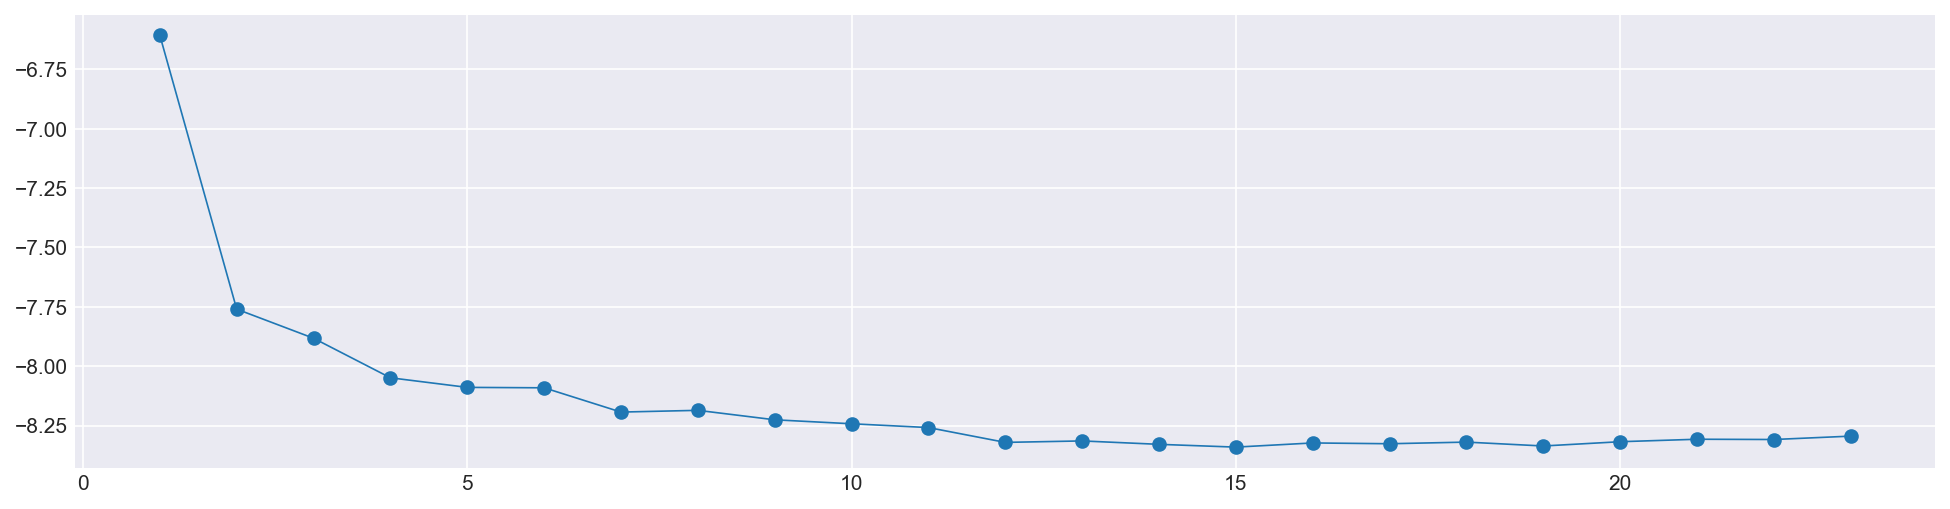

In [27]:
maxlag = 24
lag, aic = [], []
for k in range(1, maxlag):
    model = tsa.VAR(diff_df)
    result = model.fit(k)
    lag.append(k)
    aic.append(result.aic)
plt.plot(lag, aic, marker="o")
plt.show()

In [28]:
# Test Granger Causality
result = tsa.VAR(diff_df).fit(maxlags=15)
f = result.test_causality(caused="Riverside", causing="LA", kind="f")
f.summary()

Test statistic,Critical value,p-value,df
2.820,1.677,0.000,"(15, 962)"


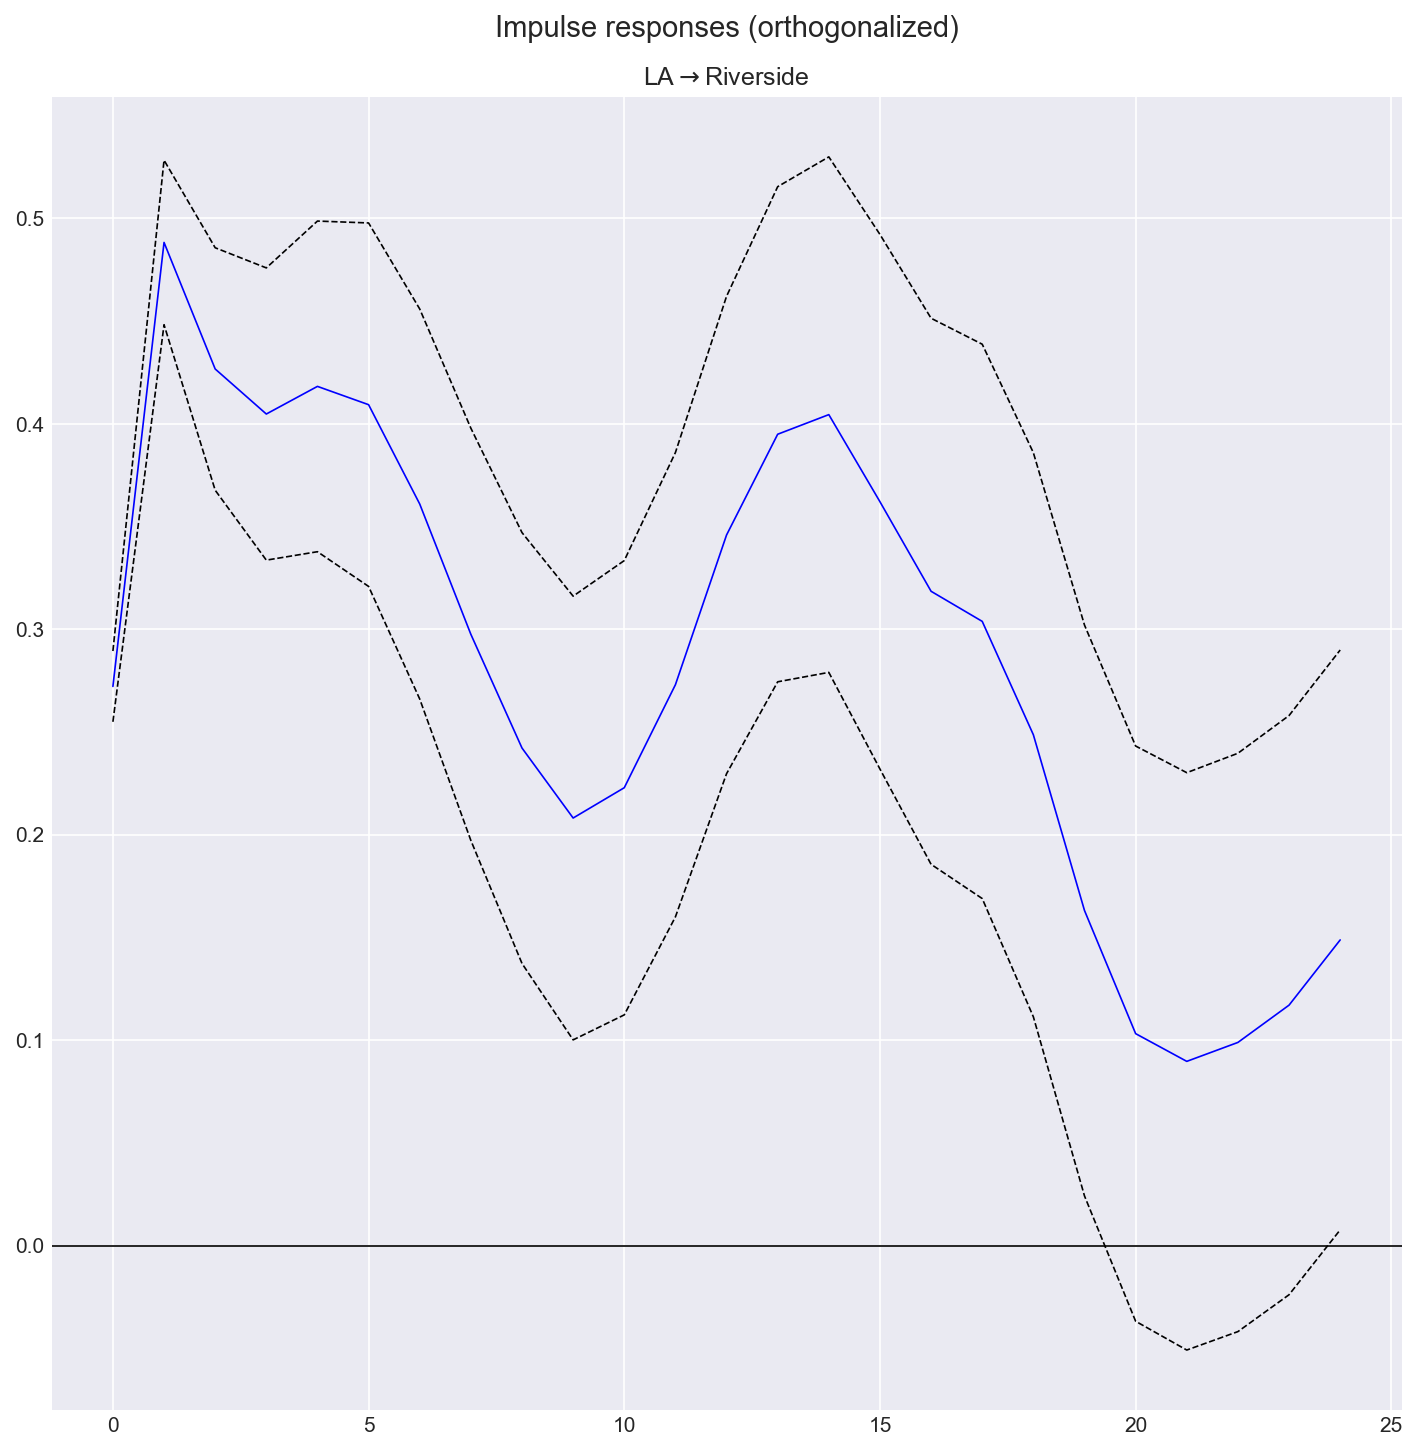

In [29]:
# Impluse Response Function
irf = result.irf(24)
irf.plot(orth=True, impulse="LA", response="Riverside")
plt.show()

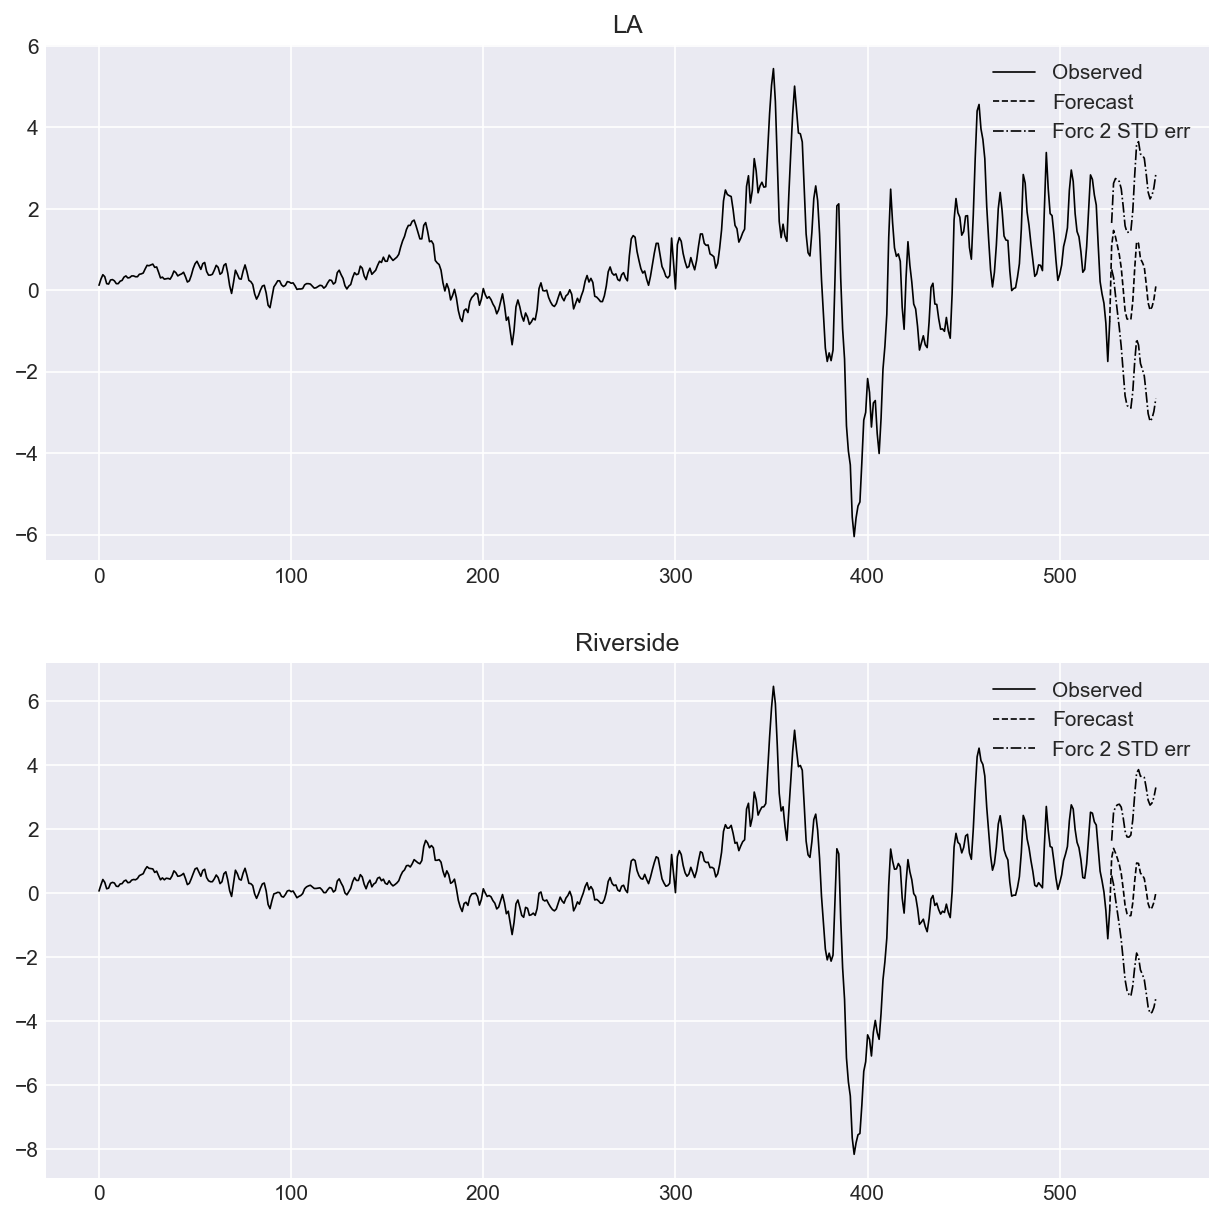

In [37]:
result.plot_forecast(24)
plt.show()